In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   #To ignore warnings given like distplot is depricated
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  #for lable encoding
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

LIBRARIES FOR MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

**DATASET LOADING AND PREPROCESSING OF THE DATA**

In [ ]:
data=pd.read_csv("/content/Train2 from anlav.csv")
print(len(data))


8128


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               8128 non-null   object 
 1   Year               8128 non-null   int64  
 2   Kilometers_Driven  8128 non-null   int64  
 3   Fuel_Type          8128 non-null   object 
 4   Transmission       8128 non-null   object 
 5   Owner_Type         8128 non-null   object 
 6   Mileage            7907 non-null   object 
 7   Engine             7907 non-null   object 
 8   Power              7913 non-null   object 
 9   Seats              7907 non-null   float64
 10  Price              8128 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [ ]:
data.isnull().sum()

Name                   0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage              221
Engine               221
Power                215
Seats                221
Price                  0
dtype: int64

In [ ]:
data = data.dropna(how='any')

In [ ]:
data.head(5)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,130000


1.I think names of the  cars are much unique so we want drop the name column from the datasets



In [ ]:
data=data.drop("Name",axis=1)

In [ ]:
data.tail(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
8123,2013,110000,Petrol,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,320000
8124,2007,119000,Diesel,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,135000
8125,2009,120000,Diesel,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,382000
8126,2013,25000,Diesel,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,290000
8127,2013,25000,Diesel,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,290000


As we can observe there are additional strings attached to mileage,engine,power like km/kg,kmpl,CC,bhp we are now that units


In [ ]:
data['Mileage'] = data['Mileage'].astype(str)
data['Power'] = data['Power'].astype(str)
data['Engine'] = data['Engine'].astype(str)
data['Mileage'] = data['Mileage'].astype(str)

data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine']  = data['Engine'].str.replace(' CC','')
data['Power']   = data['Power'].str.replace('null bhp','112')
data['Power']   = data['Power'].str.replace(' bhp','')



data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].replace('', '0')
data['Power'] = data['Power'].astype(float)



In [ ]:
data.tail()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
8123,2013,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85,5.0,320000
8124,2007,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,135000
8125,2009,120000,Diesel,Manual,First Owner,19.30,1248.0,73.90,5.0,382000
8126,2013,25000,Diesel,Manual,First Owner,23.57,1396.0,70.00,5.0,290000
8127,2013,25000,Diesel,Manual,First Owner,23.57,1396.0,70.00,5.0,290000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7907.0,2013.982168,3.866650,1994.0,2012.00,2015.0,2017.00,2020.0
Kilometers_Driven,7907.0,69192.556469,56789.761602,1.0,35000.00,60000.0,95750.00,2360457.0
Mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
Engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
Power,7907.0,91.575790,35.759792,0.0,68.05,82.0,102.00,400.0
Seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0
Price,7907.0,649741.656380,813556.530537,29999.0,270000.00,450000.0,690000.00,10000000.0


In [ ]:
data.loc[data["Seats"]==0.0,'Seats']=np.nan
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.mean(data['Seats']),inplace=True)

In [ ]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Seats.isnull().sum()
data['Mileage'].fillna(value=np.mean(data['Mileage']),inplace=True)

In [ ]:
data.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

**VISUALIZATION OF DATA & EXPLORATION OF DATA ANALYSIS**

---



In [ ]:
def bar_plot(variable):
    # get feature
    var = data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [ ]:
categorical = (data.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Fuel_Type', 'Transmission', 'Owner_Type']


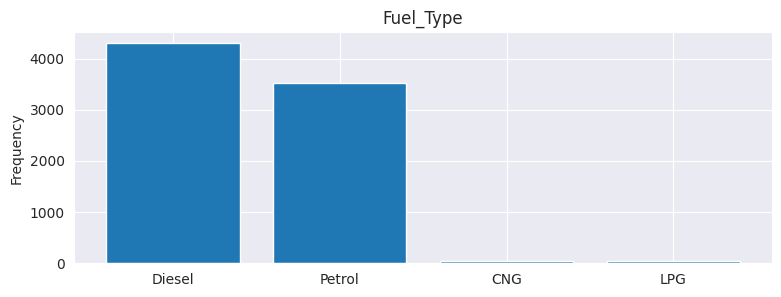

Fuel_Type:
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: Fuel_Type, dtype: int64


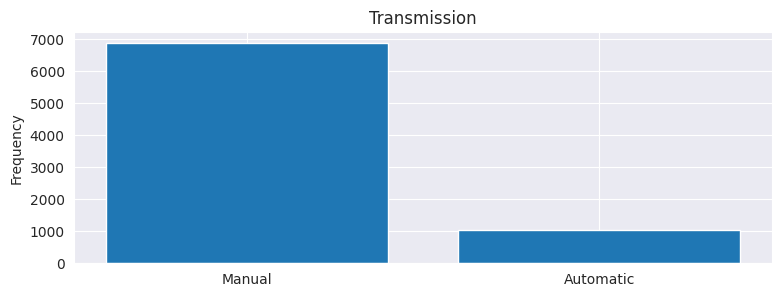

Transmission:
Manual       6866
Automatic    1041
Name: Transmission, dtype: int64


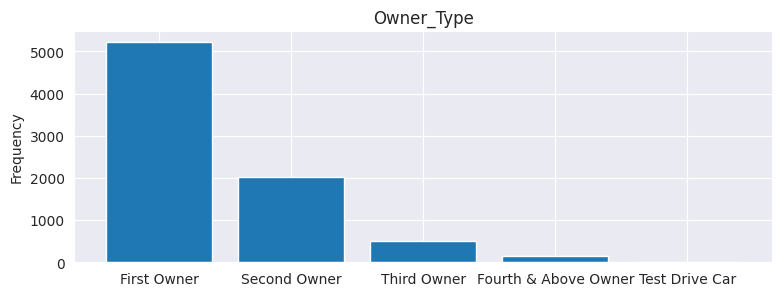

Owner_Type:
First Owner             5215
Second Owner            2017
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: Owner_Type, dtype: int64


In [ ]:
sns.set_style('darkgrid')
categorical_variables = ['Fuel_Type', 'Transmission','Owner_Type' ]
for c in categorical_variables:
    bar_plot(c)

Numerical Variables


In [ ]:
numerical_float64 =( (data.dtypes == "float64") | (data.dtypes == "int64" ))
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


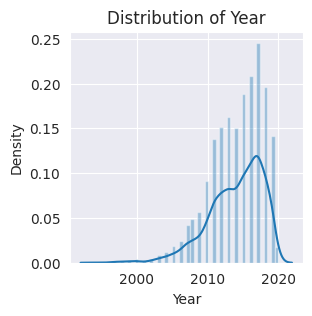

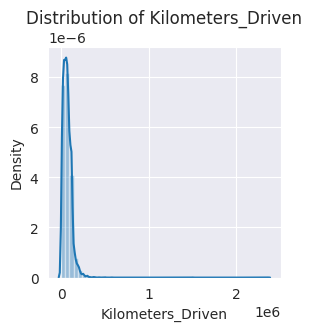

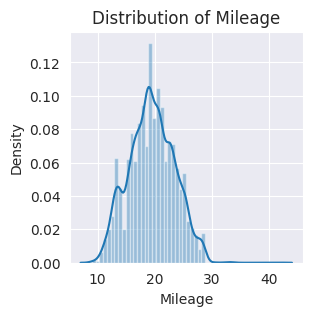

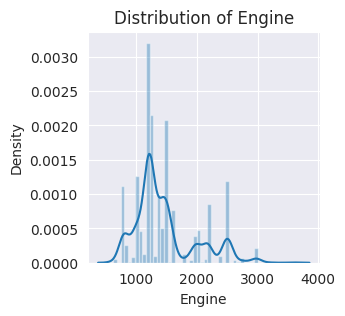

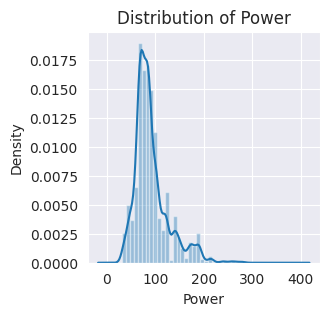

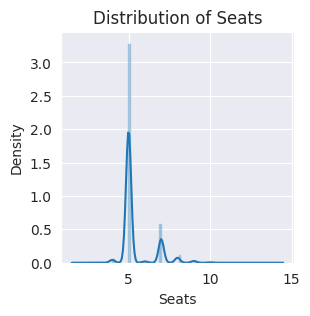

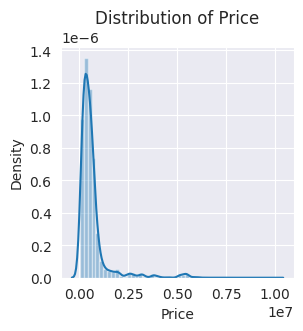

In [ ]:
numerical_variables = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for n in numerical_variables:
    plt.figure(figsize=(3, 3))
    sns.distplot(data[n])
    plt.title(f'Distribution of {n}')
    plt.show()

Removal of outliers

Year
Skew : -1.0


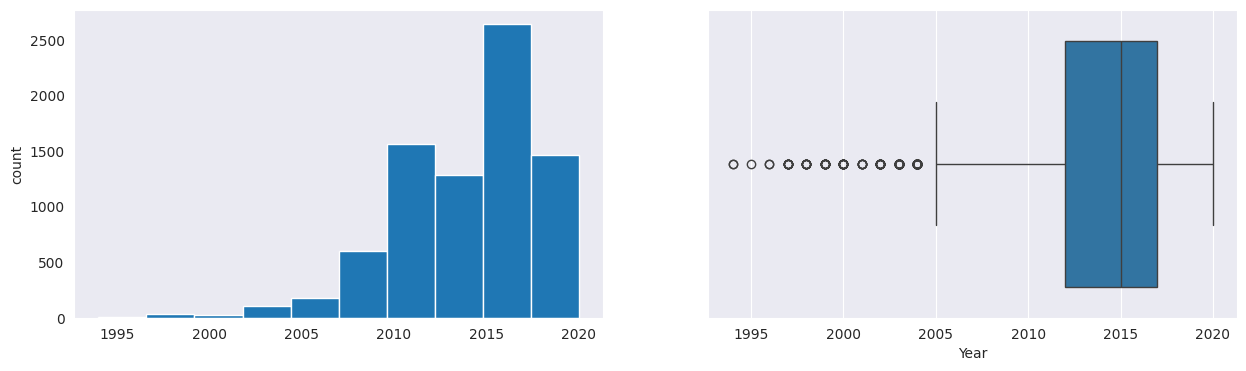

Kilometers_Driven
Skew : 11.34


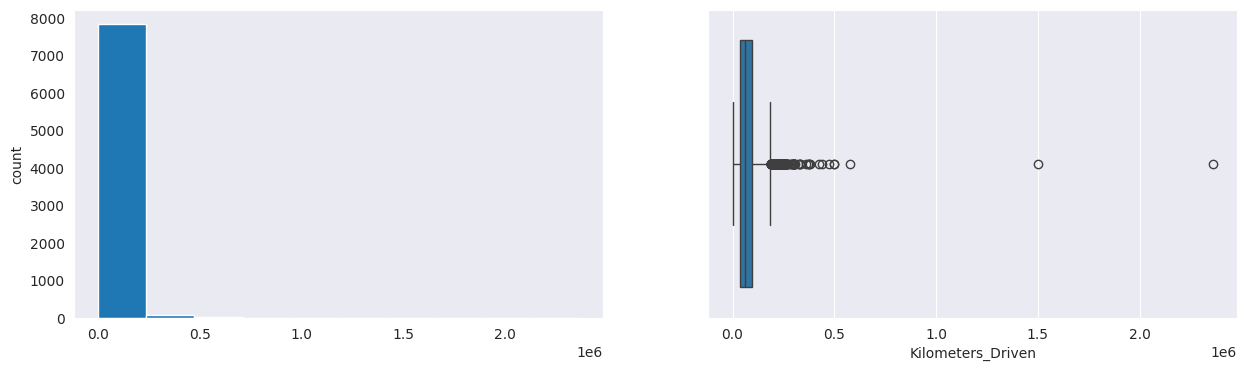

Mileage
Skew : 0.07


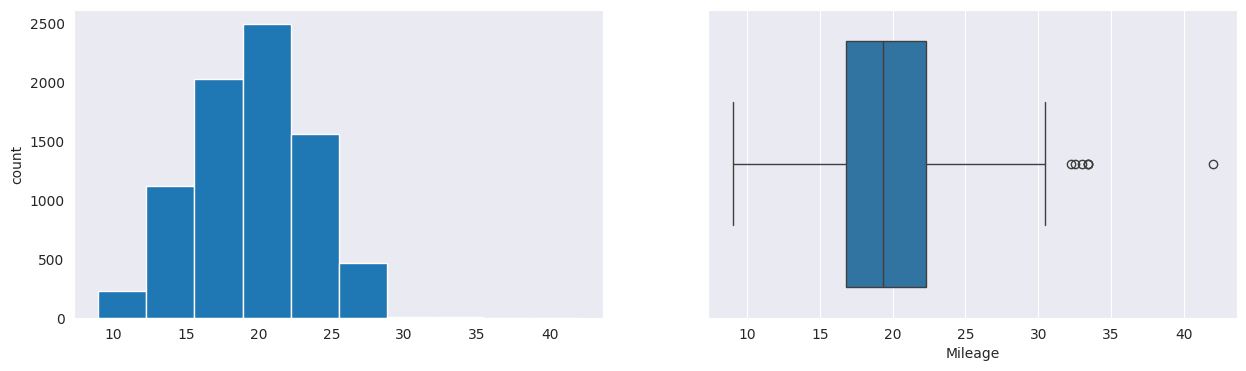

Engine
Skew : 1.14


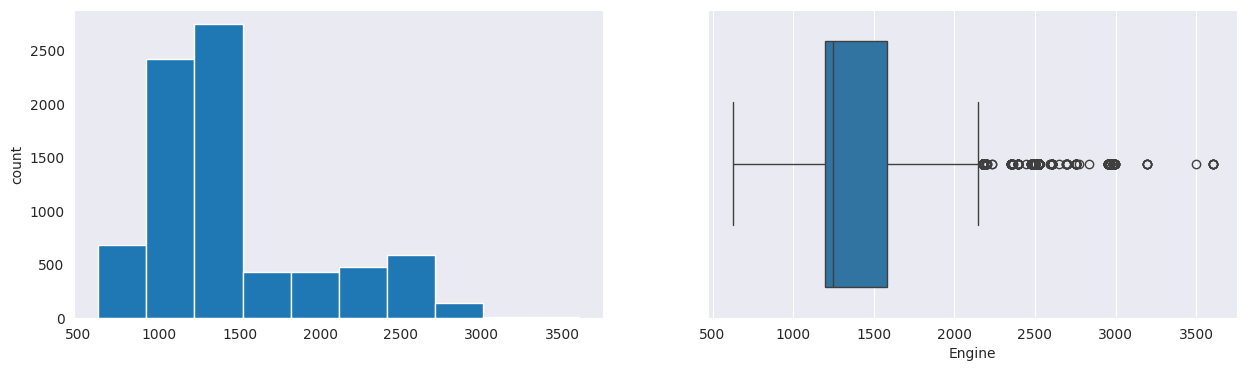

Power
Skew : 1.64


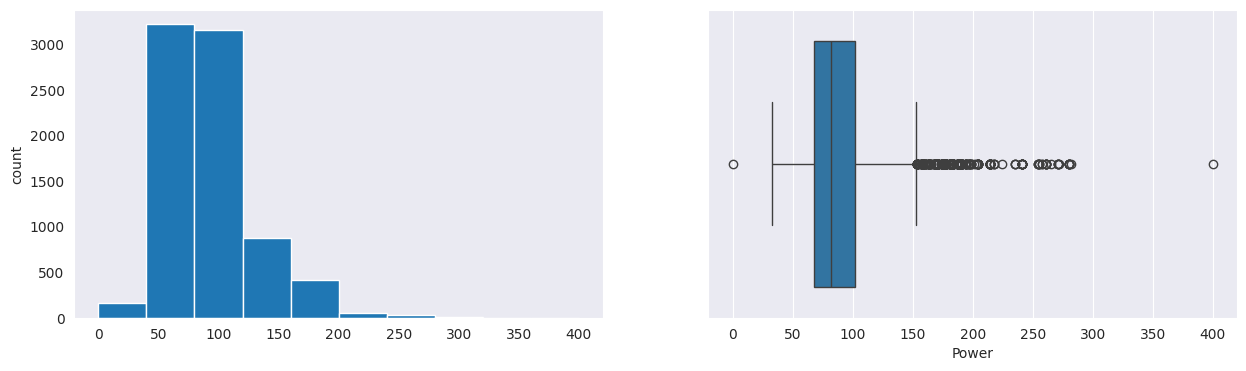

Seats
Skew : 1.97


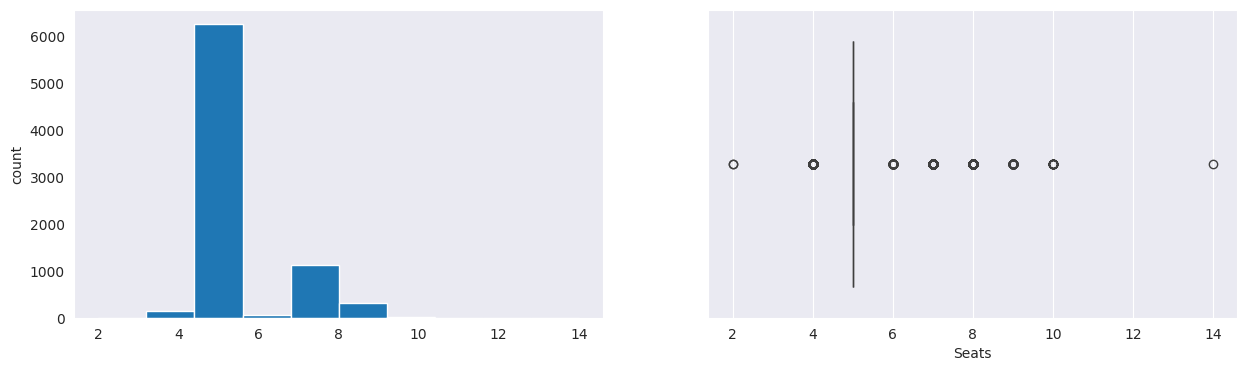

Price
Skew : 4.16


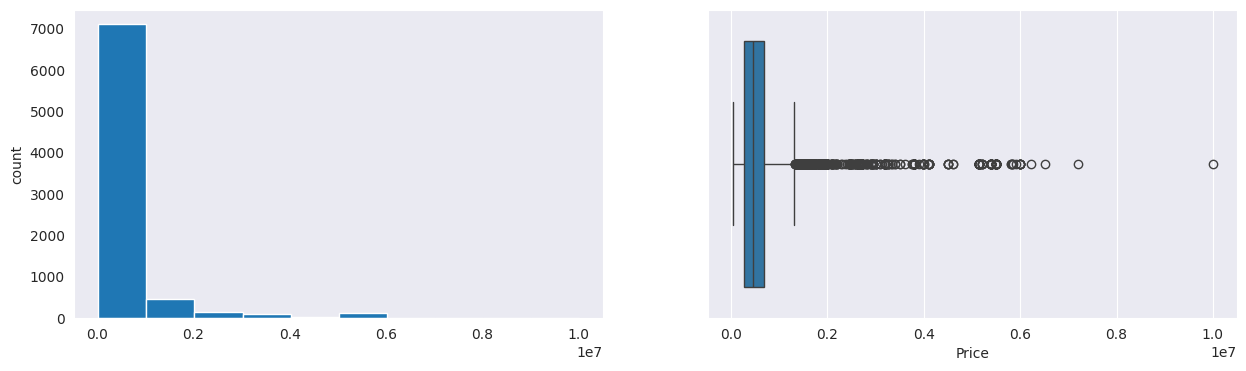

In [ ]:
for col in numerical_float64_list:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

There are outliers in it ,so we are removing these outliers

There is also skewing in engine,price,power

In [ ]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2014,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,2014,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,2006,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,2010,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,2007,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


Removal of outliers for the data based on the IQR(Inter Quartile Range)


In [ ]:
'''columns=['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price']
for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Drop rows with values outside the bounds
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]'''




"columns=['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price']\nfor column in columns:\n        Q1 = data[column].quantile(0.25)\n        Q3 = data[column].quantile(0.75)\n        IQR = Q3 - Q1\n\n        # Define the lower and upper bounds for outliers\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n\n        # Drop rows with values outside the bounds\n        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]"

In [ ]:
for i in numerical_variables:
    if i!="Seats":
      upper_limit =data[i].quantile(0.99)
      lower_limit =data[i].quantile(0.01)
      data[i] = np.where(data[i] > upper_limit,upper_limit,np.where(data[i] < lower_limit, lower_limit, data[i] ))

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7907.0,2014.007462,3.731410,2003.00,2012.00,2015.00,2017.00,2.019000e+03
Kilometers_Driven,7907.0,68154.130644,44968.266441,4000.00,35000.00,60000.00,95750.00,2.250000e+05
Mileage,7907.0,19.461616,3.901879,11.36,16.78,19.33,22.32,2.840000e+01
Engine,7907.0,1458.308461,500.130498,796.00,1197.00,1248.00,1582.00,2.967000e+03
Power,7907.0,91.340164,34.622007,37.00,68.05,82.00,102.00,2.139264e+02
Seats,7907.0,5.416719,0.959588,2.00,5.00,5.00,5.00,1.400000e+01
Price,7907.0,645579.076236,786050.120474,55743.06,270000.00,450000.00,690000.00,5.200000e+06


**Skewness after Removing the outliers**[link text](https://)

In [ ]:
for i in  (numerical_variables):
    print(i+" ")
    print("Skewness: %f" % data[i].skew())
    print(" ")


Year 
Skewness: -0.784648
 
Kilometers_Driven 
Skewness: 0.961800
 
Mileage 
Skewness: 0.051384
 
Engine 
Skewness: 1.107862
 
Power 
Skewness: 1.383332
 
Seats 
Skewness: 1.969914
 
Price 
Skewness: 3.903357
 


Box plots after removal of outliers

Year


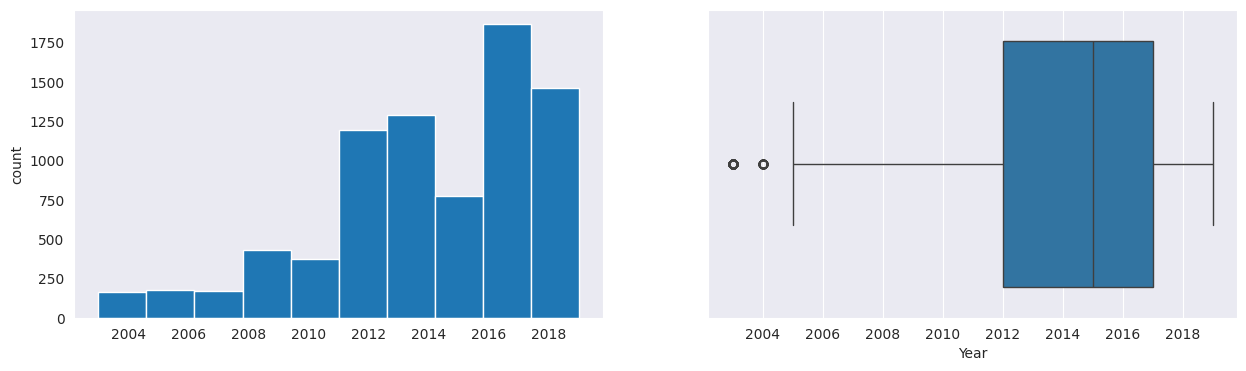

Kilometers_Driven


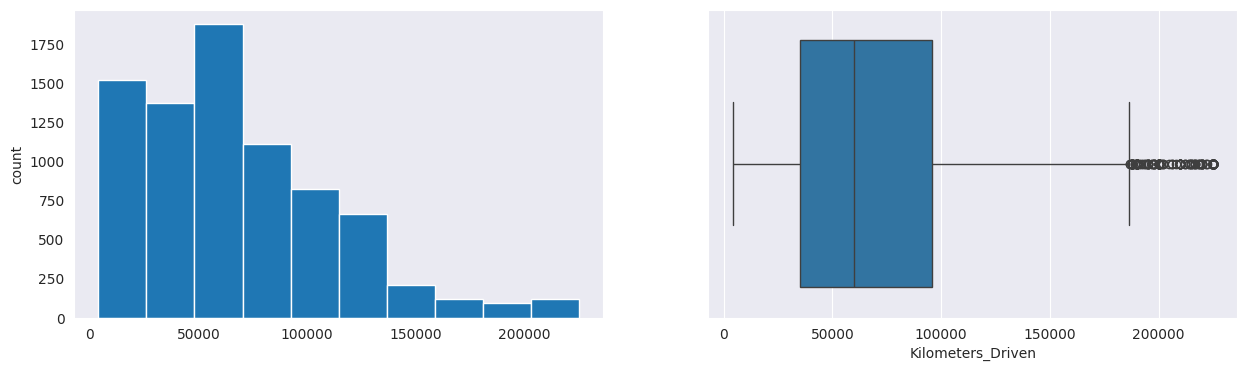

Mileage


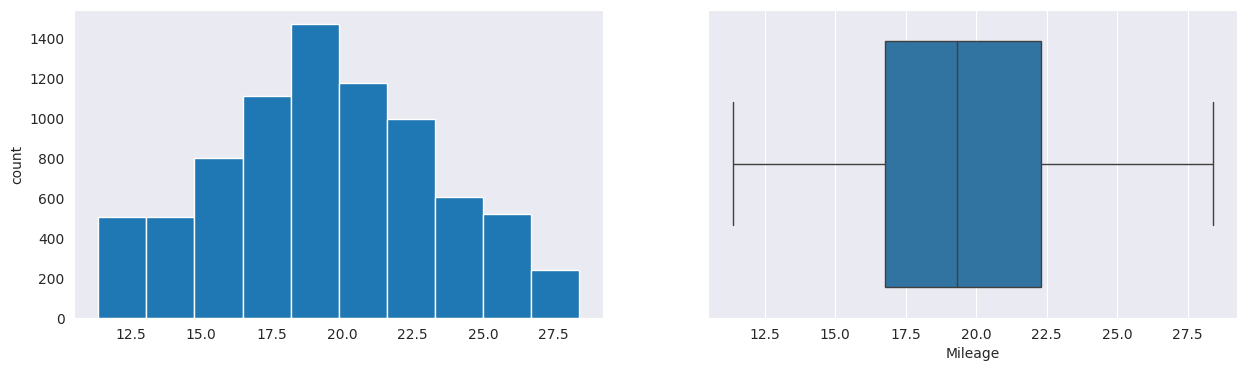

Engine


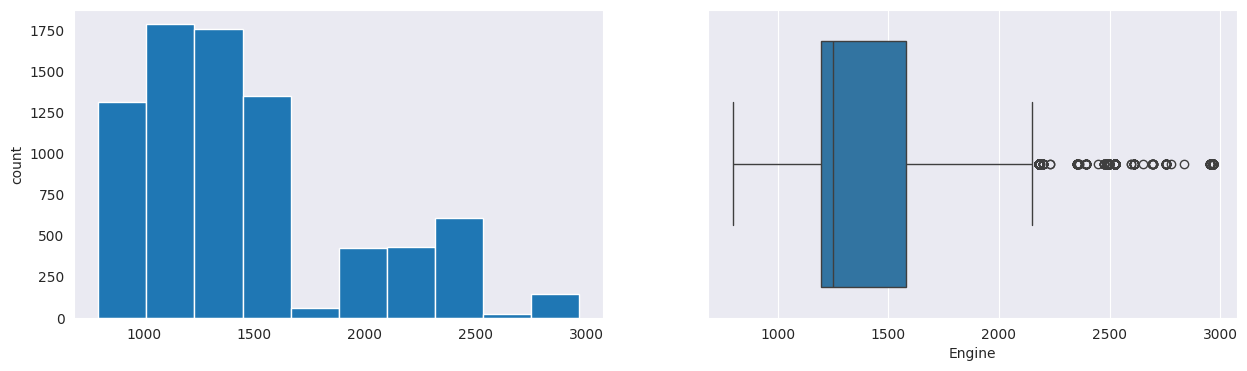

Power


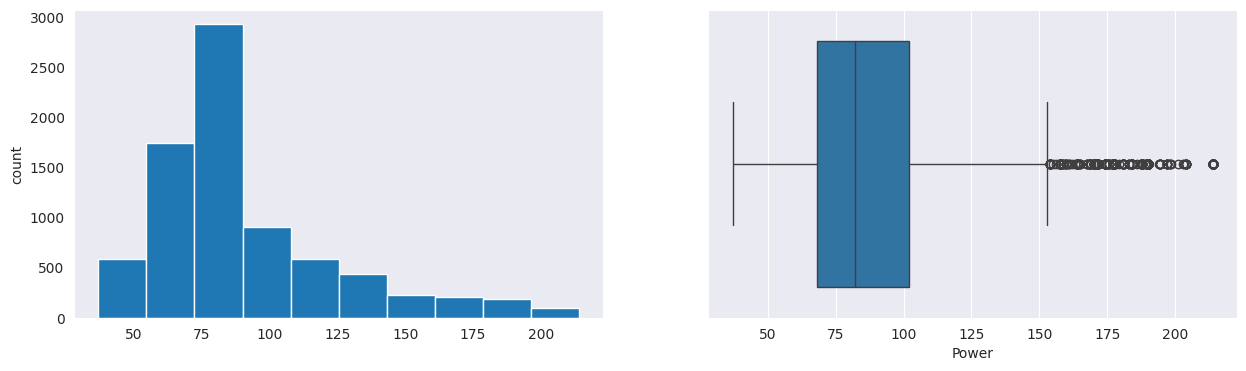

Price


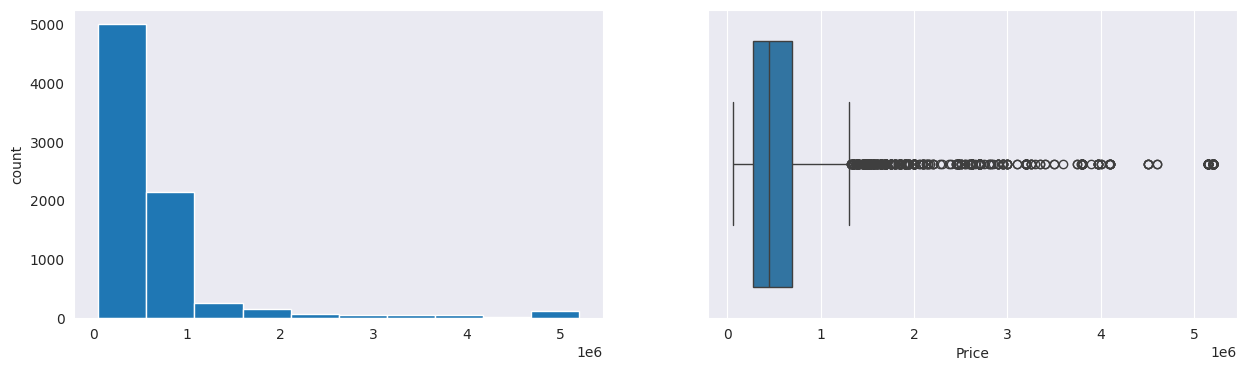

In [ ]:
for col in numerical_float64_list:
  if col!="Seats":
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

After detection and capping

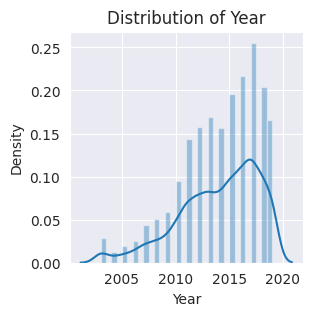

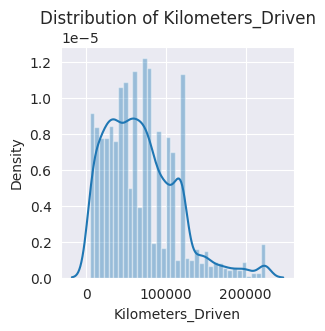

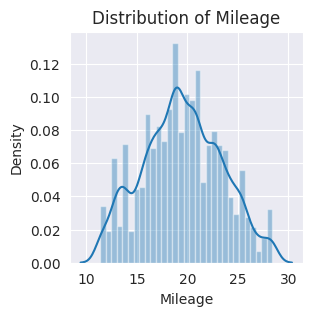

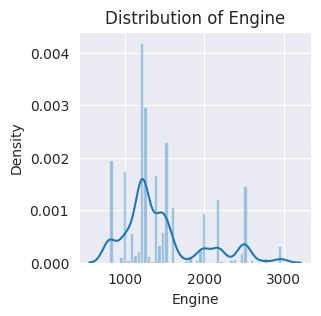

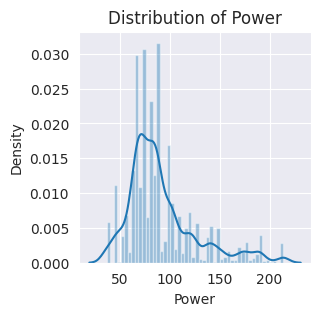

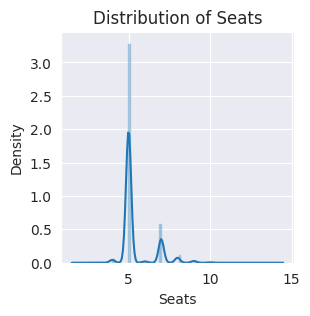

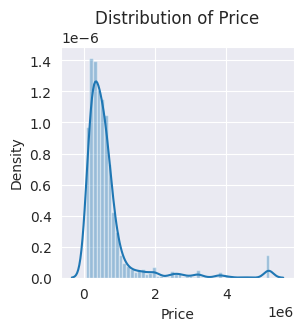

In [ ]:
numerical_variables = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for n in numerical_variables:
    plt.figure(figsize=(3, 3))
    sns.distplot(data[n])
    plt.title(f'Distribution of {n}')
    plt.show()

**ENCODING CATEGORICAL VARIABLES**

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for i in categorical_variables:
  data[i] = label_encoder.fit_transform(data[i])


In [ ]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2014.0,145500.0,1,1,0,23.40,1248.0,74.00,5.0,450000.0
1,2014.0,120000.0,1,1,2,21.14,1498.0,103.52,5.0,370000.0
2,2006.0,140000.0,3,1,4,17.70,1497.0,78.00,5.0,158000.0
3,2010.0,127000.0,1,1,0,23.00,1396.0,90.00,5.0,225000.0
4,2007.0,120000.0,3,1,0,16.10,1298.0,88.20,5.0,130000.0


CORRELATION

In [ ]:
print("Find most important features relative to Price-target")
corr = data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.748925
Engine               0.459971
Year                 0.427884
Seats                0.045805
Mileage             -0.134594
Fuel_Type           -0.197474
Owner_Type          -0.229912
Kilometers_Driven   -0.278614
Transmission        -0.596970
Name: Price, dtype: float64


HEAT MAP FOR CORRELATION

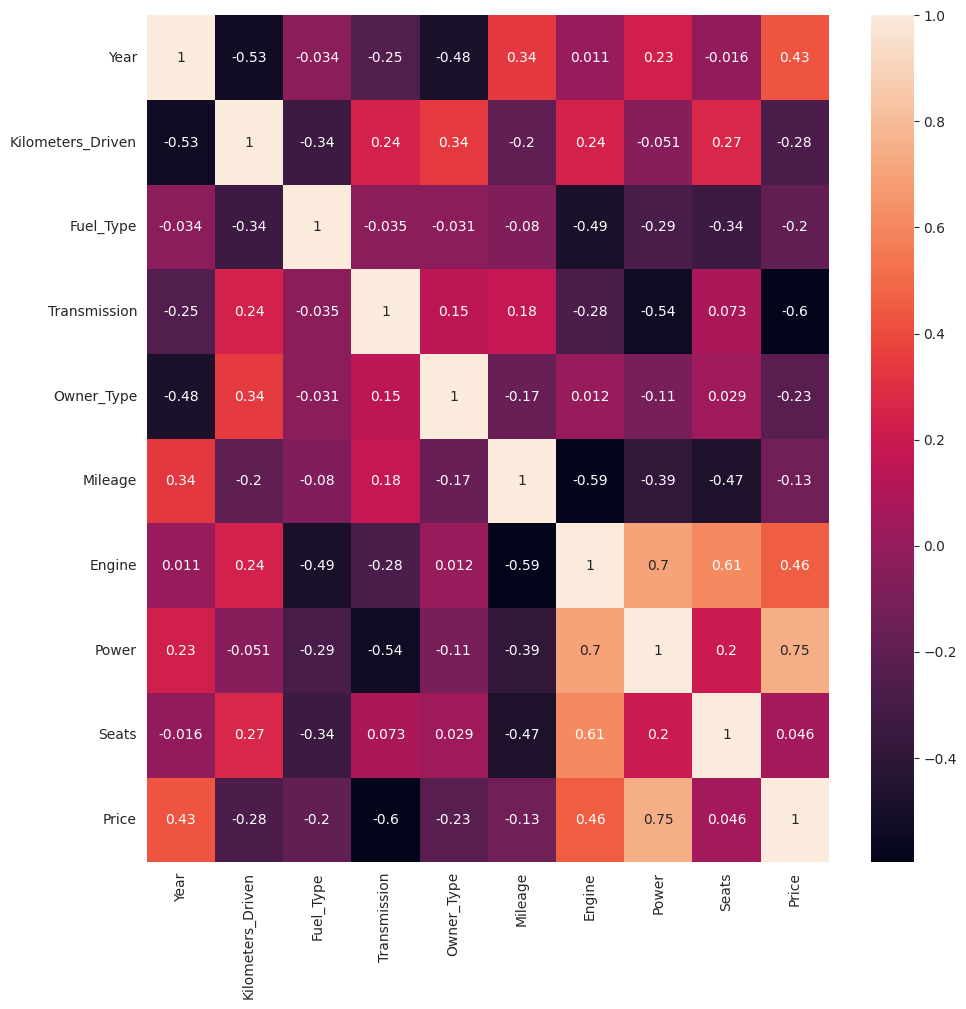

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.drop(['Seats'], axis=1,inplace=True)#done ra

In [ ]:
print(data.columns)

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Price'],
      dtype='object')


In [ ]:
data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2014.0,145500.0,1,1,0,23.40,1248.0,74.00,450000.0
1,2014.0,120000.0,1,1,2,21.14,1498.0,103.52,370000.0
2,2006.0,140000.0,3,1,4,17.70,1497.0,78.00,158000.0
3,2010.0,127000.0,1,1,0,23.00,1396.0,90.00,225000.0
4,2007.0,120000.0,3,1,0,16.10,1298.0,88.20,130000.0


**BUILDING MODEL**

Spliting data

In [ ]:
x=data.drop('Price',axis=1) #dependent variables
y=data['Price']       #Independent variables

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
#sc=StandardScaler()

#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

Training data

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

xgb=GradientBoostingRegressor()
xgb.fit(x_train,y_train)

xg=XGBRegressor()
xg.fit(x_train,y_train)
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)


DecisionTreeRegressor()

Evalution of models

In [ ]:
score1=lr.score(x_test,y_test)
score2=rf.score(x_test,y_test)
score3=xgb.score(x_test,y_test)
score4=xg.score(x_test,y_test)
score5=dc.score(x_test,y_test)

In [ ]:
score6=lr.score(x_train,y_train)
score7=rf.score(x_train,y_train)
score8=xgb.score(x_train,y_train)
score9=xg.score(x_train,y_train)
score0=dc.score(x_train,y_train)

In [ ]:

print(score1)
print(" ")
print(score2)
print(" ")
print(score3)
print(" ")
print(score4)
print(" ")
print(score5)

0.6895972320457975
 
0.9819624354826981
 
0.9649756034119623
 
0.9813162717987451
 
0.9685472076172044


Train scores

In [ ]:
print(score6)
print(" ")
print(score7)
print(" ")
print(score8)
print(" ")
print(score9)
print(" ")
print(score0)

0.6768109780638858
 
0.9958703289910839
 
0.9712119470174256
 
0.9956855080317677
 
0.9995235538610013


In [ ]:
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, x_train, y_train, cv=kf, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Mean R2 Score: {np.mean(cv_scores)}')

Cross-Validation R2 Scores: [0.96760932 0.96982322 0.96955251 0.97408518 0.96646034 0.97244788
 0.97480266 0.97915161 0.97532824 0.97185954]
Mean R2 Score: 0.9721120505267539


In [ ]:
#import joblib
#joblib.dump(rf,"model_rf.pkl")

In [ ]:
import pickle
pickle.dump(xgb,open('xgb.pkl','wb'))
